# Nessecary Libraries

In [1]:
import pandas as pd
import json
import ast
from datetime import datetime
from matplotlib.dates import DateFormatter
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import json_normalize

# Preprocessing Instagram Liked Posts Data

In [55]:
with open("liked_posts_all.json", 'r') as file:
    data = json.load(file)

# Use json_normalize to flatten the nested JSON structure
insta_likes = json_normalize(data)

# to make timestamp values a column
insta_likes['string_list_data'] = insta_likes['string_list_data'].apply(lambda x: x[0])
insta_likes['string_list_data'] = insta_likes['string_list_data'].apply(lambda x: x['timestamp'])
insta_likes.rename(columns={'string_list_data': 'timestamp'}, inplace=True)
insta_likes.rename(columns={'title': 'user'}, inplace=True)

# a function to change timestamps to datetime
def convert_timestamp_to_datetime(timestamp):
    return datetime.utcfromtimestamp(timestamp).strftime('%Y-%m-%d')

def convert_timestamp_to_datetime2(timestamp):
    return datetime.utcfromtimestamp(timestamp).strftime('%Y-%m')

# changes df timestamp values to datetime obj
insta_likes['date'] = insta_likes['timestamp'].apply(convert_timestamp_to_datetime)
insta_likes.head()

insta_likes['year-month'] = insta_likes['timestamp'].apply(convert_timestamp_to_datetime2)
  
insta_likes['post_count'] = insta_likes['user'].map(insta_likes['user'].value_counts())
insta_likes['post_count'] = insta_likes['post_count'].fillna(0).astype(int)

#insta_likes = insta_likes.sort_values(by='post_count', ascending=False)



insta_likes.head()

,user,timestamp,date
0,makeuprabbit,1606772058,2020-11-30
1,the_female_lead,1606771889,2020-11-30
2,the_frohaven,1606771879,2020-11-30
3,psychicmedium.trish,1606771744,2020-11-30
4,farquaadhater,1606771450,2020-11-30


creating a separete df for liked post

In [3]:
title_timestamps_dict = {}

for title, group in insta_likes.groupby('user'):
    title_timestamps_dict[title] = list(group['date'])

# Create a DataFrame from the dictionary
liked_user_posts = pd.DataFrame(list(title_timestamps_dict.items()), columns=['user', 'timestamp_list'])

# Add a 'post_count' column to new_df
liked_user_posts['post_count'] = liked_user_posts['user'].map(insta_likes['user'].value_counts())

# Sort the DataFrame based on the 'post_count' column in descending order
liked_user_posts = liked_user_posts.sort_values(by='post_count', ascending=False)

# Resetting the index after sorting
liked_user_posts = liked_user_posts.reset_index(drop=True)

# Display the DataFrame
#liked_user_posts.head()

print(liked_user_posts)

                              user  \
0      toplumsal.cinsiyet.esitligi   
1                    polina.bright   
2                 celine_bernaerts   
3                       gublergram   
4                lesya_poplavskaya   
...                            ...   
37081                    huge.chad   
37082                 hudsonbegood   
37083                      hudolls   
37084                   hudabeauty   
37085                  komedincity   

                                          timestamp_list  post_count  
0      [2020-11-07, 2020-09-04, 2021-01-02, 2021-11-1...        1235  
1      [2019-11-27, 2020-03-05, 2019-10-15, 2019-06-2...         373  
2      [2019-09-20, 2019-08-29, 2019-10-14, 2020-03-2...         323  
3      [2019-10-25, 2022-05-09, 2020-10-13, 2019-10-2...         321  
4      [2019-07-15, 2019-05-03, 2019-05-13, 2019-07-1...         317  
...                                                  ...         ...  
37081                                       [2

# Preprocessing Instagram Followings Data

In [56]:
with open("following_1.json", 'r') as file:
    data = json.load(file)

# Use json_normalize to flatten the nested JSON structure
insta_followings = json_normalize(data)

insta_followings = insta_followings.drop(columns=['title','media_list_data'])

insta_followings['string_list_data'] = insta_followings['string_list_data'].apply(lambda x: x[0])
insta_followings['timestamp'] = insta_followings['string_list_data'].apply(lambda x: x['timestamp']) 
insta_followings['string_list_data'] = insta_followings['string_list_data'].apply(lambda x: x['value'])
insta_followings.rename(columns={'string_list_data': 'user'}, inplace=True)


insta_followings['date'] = insta_followings['timestamp'].apply(convert_timestamp_to_datetime)

insta_followings.head()


,user,timestamp,date
0,selenay.buse,1705672981,2024-01-19
1,pierrot_lou,1705490392,2024-01-17
2,mastertingus,1704622298,2024-01-07
3,arozear,1704489669,2024-01-05
4,ahsenbucek,1704465984,2024-01-05


In [5]:
liked_user_posts['followed'] = liked_user_posts['user'].isin(insta_followings['user']).astype(int)

insta_likes['followed'] = insta_likes['user'].isin(insta_followings['user']).astype(int)

print(liked_user_posts)

                              user  \
0      toplumsal.cinsiyet.esitligi   
1                    polina.bright   
2                 celine_bernaerts   
3                       gublergram   
4                lesya_poplavskaya   
...                            ...   
37081                    huge.chad   
37082                 hudsonbegood   
37083                      hudolls   
37084                   hudabeauty   
37085                  komedincity   

                                          timestamp_list  post_count  followed  
0      [2020-11-07, 2020-09-04, 2021-01-02, 2021-11-1...        1235         1  
1      [2019-11-27, 2020-03-05, 2019-10-15, 2019-06-2...         373         0  
2      [2019-09-20, 2019-08-29, 2019-10-14, 2020-03-2...         323         1  
3      [2019-10-25, 2022-05-09, 2020-10-13, 2019-10-2...         321         1  
4      [2019-07-15, 2019-05-03, 2019-05-13, 2019-07-1...         317         1  
...                                                  ... 

# Scatter Plot

C:\Users\Ezgi\AppData\Local\Temp\ipykernel_13068\3775100933.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ten_1.loc[:, 'follow_date'] = top_ten_1['user'].map(insta_followings.set_index('user')['date'])


                             user   timestamp        date year-month  \
0                   qubitrobotics  1532675569  2018-07-27    2018-07   
1                   qubitrobotics  1532675609  2018-07-27    2018-07   
2                   qubitrobotics  1532675608  2018-07-27    2018-07   
3                   qubitrobotics  1532675563  2018-07-27    2018-07   
4                   qubitrobotics  1532675606  2018-07-27    2018-07   
...                           ...         ...         ...        ...   
5731  toplumsal.cinsiyet.esitligi  1704101914  2024-01-01    2024-01   
5732  toplumsal.cinsiyet.esitligi  1704492088  2024-01-05    2024-01   
5733  toplumsal.cinsiyet.esitligi  1704895866  2024-01-10    2024-01   
5734  toplumsal.cinsiyet.esitligi  1704974486  2024-01-11    2024-01   
5735                   gublergram  1705128829  2024-01-13    2024-01   

      post_count  followed follow_date  
0            270         1  2018-05-28  
1            270         1  2018-05-28  
2           

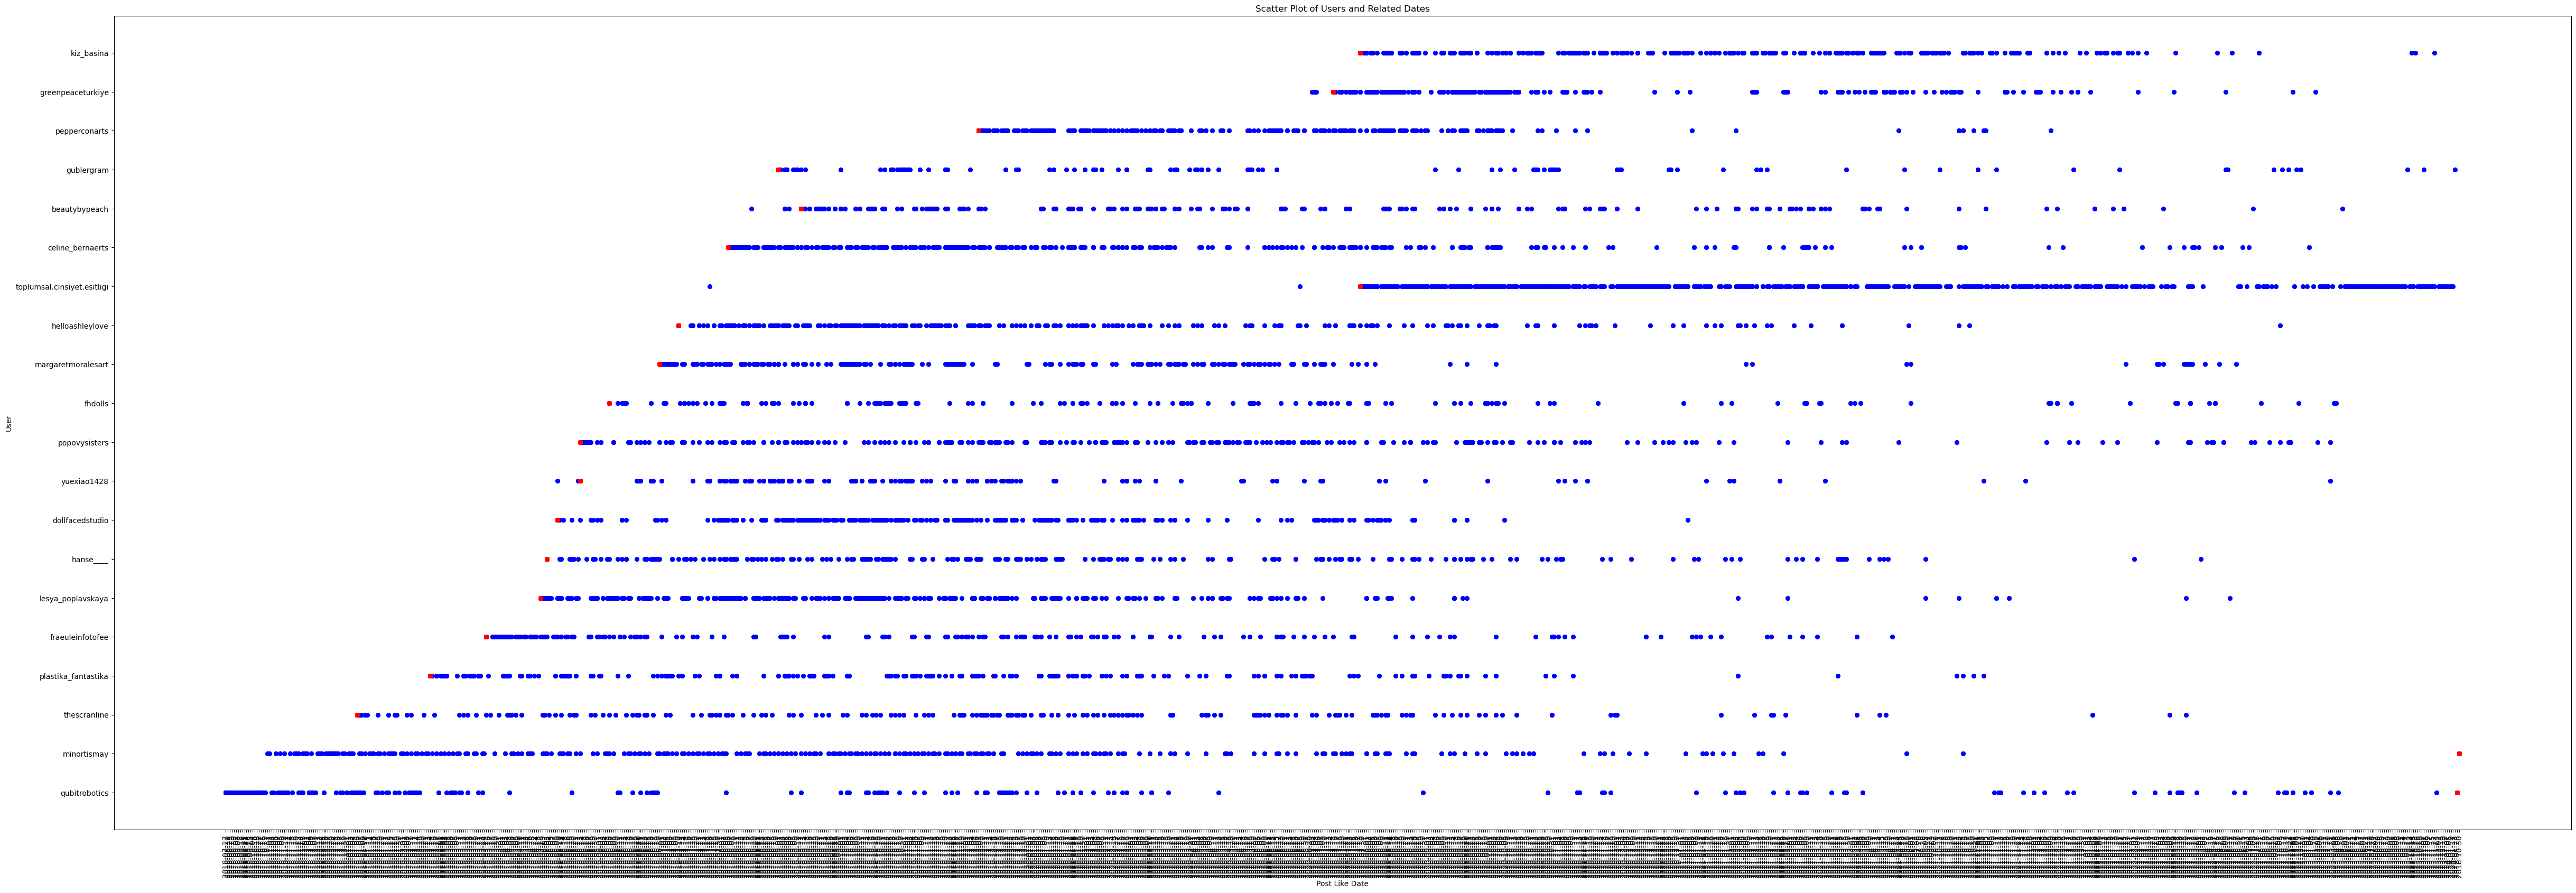

In [9]:
followed_rows_1 = insta_likes[insta_likes['followed'] == 1]

followed_rows = liked_user_posts[liked_user_posts['followed'] == 1]

top_ten_followed = followed_rows.head(20)

total_post_top_ten = top_ten_followed['post_count'].sum()

top_ten_1 = followed_rows_1.head(total_post_top_ten)

top_ten_1.loc[:, 'follow_date'] = top_ten_1['user'].map(insta_followings.set_index('user')['date'])

top_ten_1 = top_ten_1.sort_values(by='date', ascending= True)
top_ten_1 = top_ten_1.reset_index(drop=True)

print(top_ten_1)

plt.figure(figsize= (60,20))

plt.scatter(top_ten_1['date'], top_ten_1['user'], s= 30)

plt.scatter(top_ten_1['date'], top_ten_1['user'], s= 30, c='blue')
plt.scatter(top_ten_1['follow_date'], top_ten_1['user'], s=30, c='red')

# Customize the plot as needed
plt.xlabel('Post Like Date')
plt.ylabel('User')

plt.xticks(rotation='vertical')

plt.title('Scatter Plot of Users and Related Dates')
plt.show()

# Liked Post Count per Month by User

In [15]:
likes_per_month_df = insta_likes.groupby(['user', 'year-month']).size().reset_index(name='count')
likes_per_month_df.head()

# Merge the count DataFrame with the original DataFrame
likes_per_month_df = pd.merge(insta_likes, likes_per_month_df, on=['user', 'year-month'])

# Drop duplicated rows based on 'user' and 'year-month'
likes_per_month_df = likes_per_month_df.drop_duplicates(subset=['user', 'year-month'])

likes_per_month_df = likes_per_month_df[likes_per_month_df['user'].isin(top_ten_1['user'])]

print(likes_per_month_df)

                             user   timestamp        date year-month  \
0     toplumsal.cinsiyet.esitligi  1604777930  2020-11-07    2020-11   
45    toplumsal.cinsiyet.esitligi  1599218102  2020-09-04    2020-09   
120   toplumsal.cinsiyet.esitligi  1609598370  2021-01-02    2021-01   
143   toplumsal.cinsiyet.esitligi  1636889009  2021-11-14    2021-11   
178   toplumsal.cinsiyet.esitligi  1596131564  2020-07-30    2020-07   
...                           ...         ...         ...        ...   
6943             fraeuleinfotofee  1608651635  2020-12-22    2020-12   
6946             fraeuleinfotofee  1610976286  2021-01-18    2021-01   
6951             fraeuleinfotofee  1599906348  2020-09-12    2020-09   
6955             fraeuleinfotofee  1598272610  2020-08-24    2020-08   
6957             fraeuleinfotofee  1619011416  2021-04-21    2021-04   

      post_count  followed  count  
0           1235         1     45  
45          1235         1     75  
120         1235         1 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


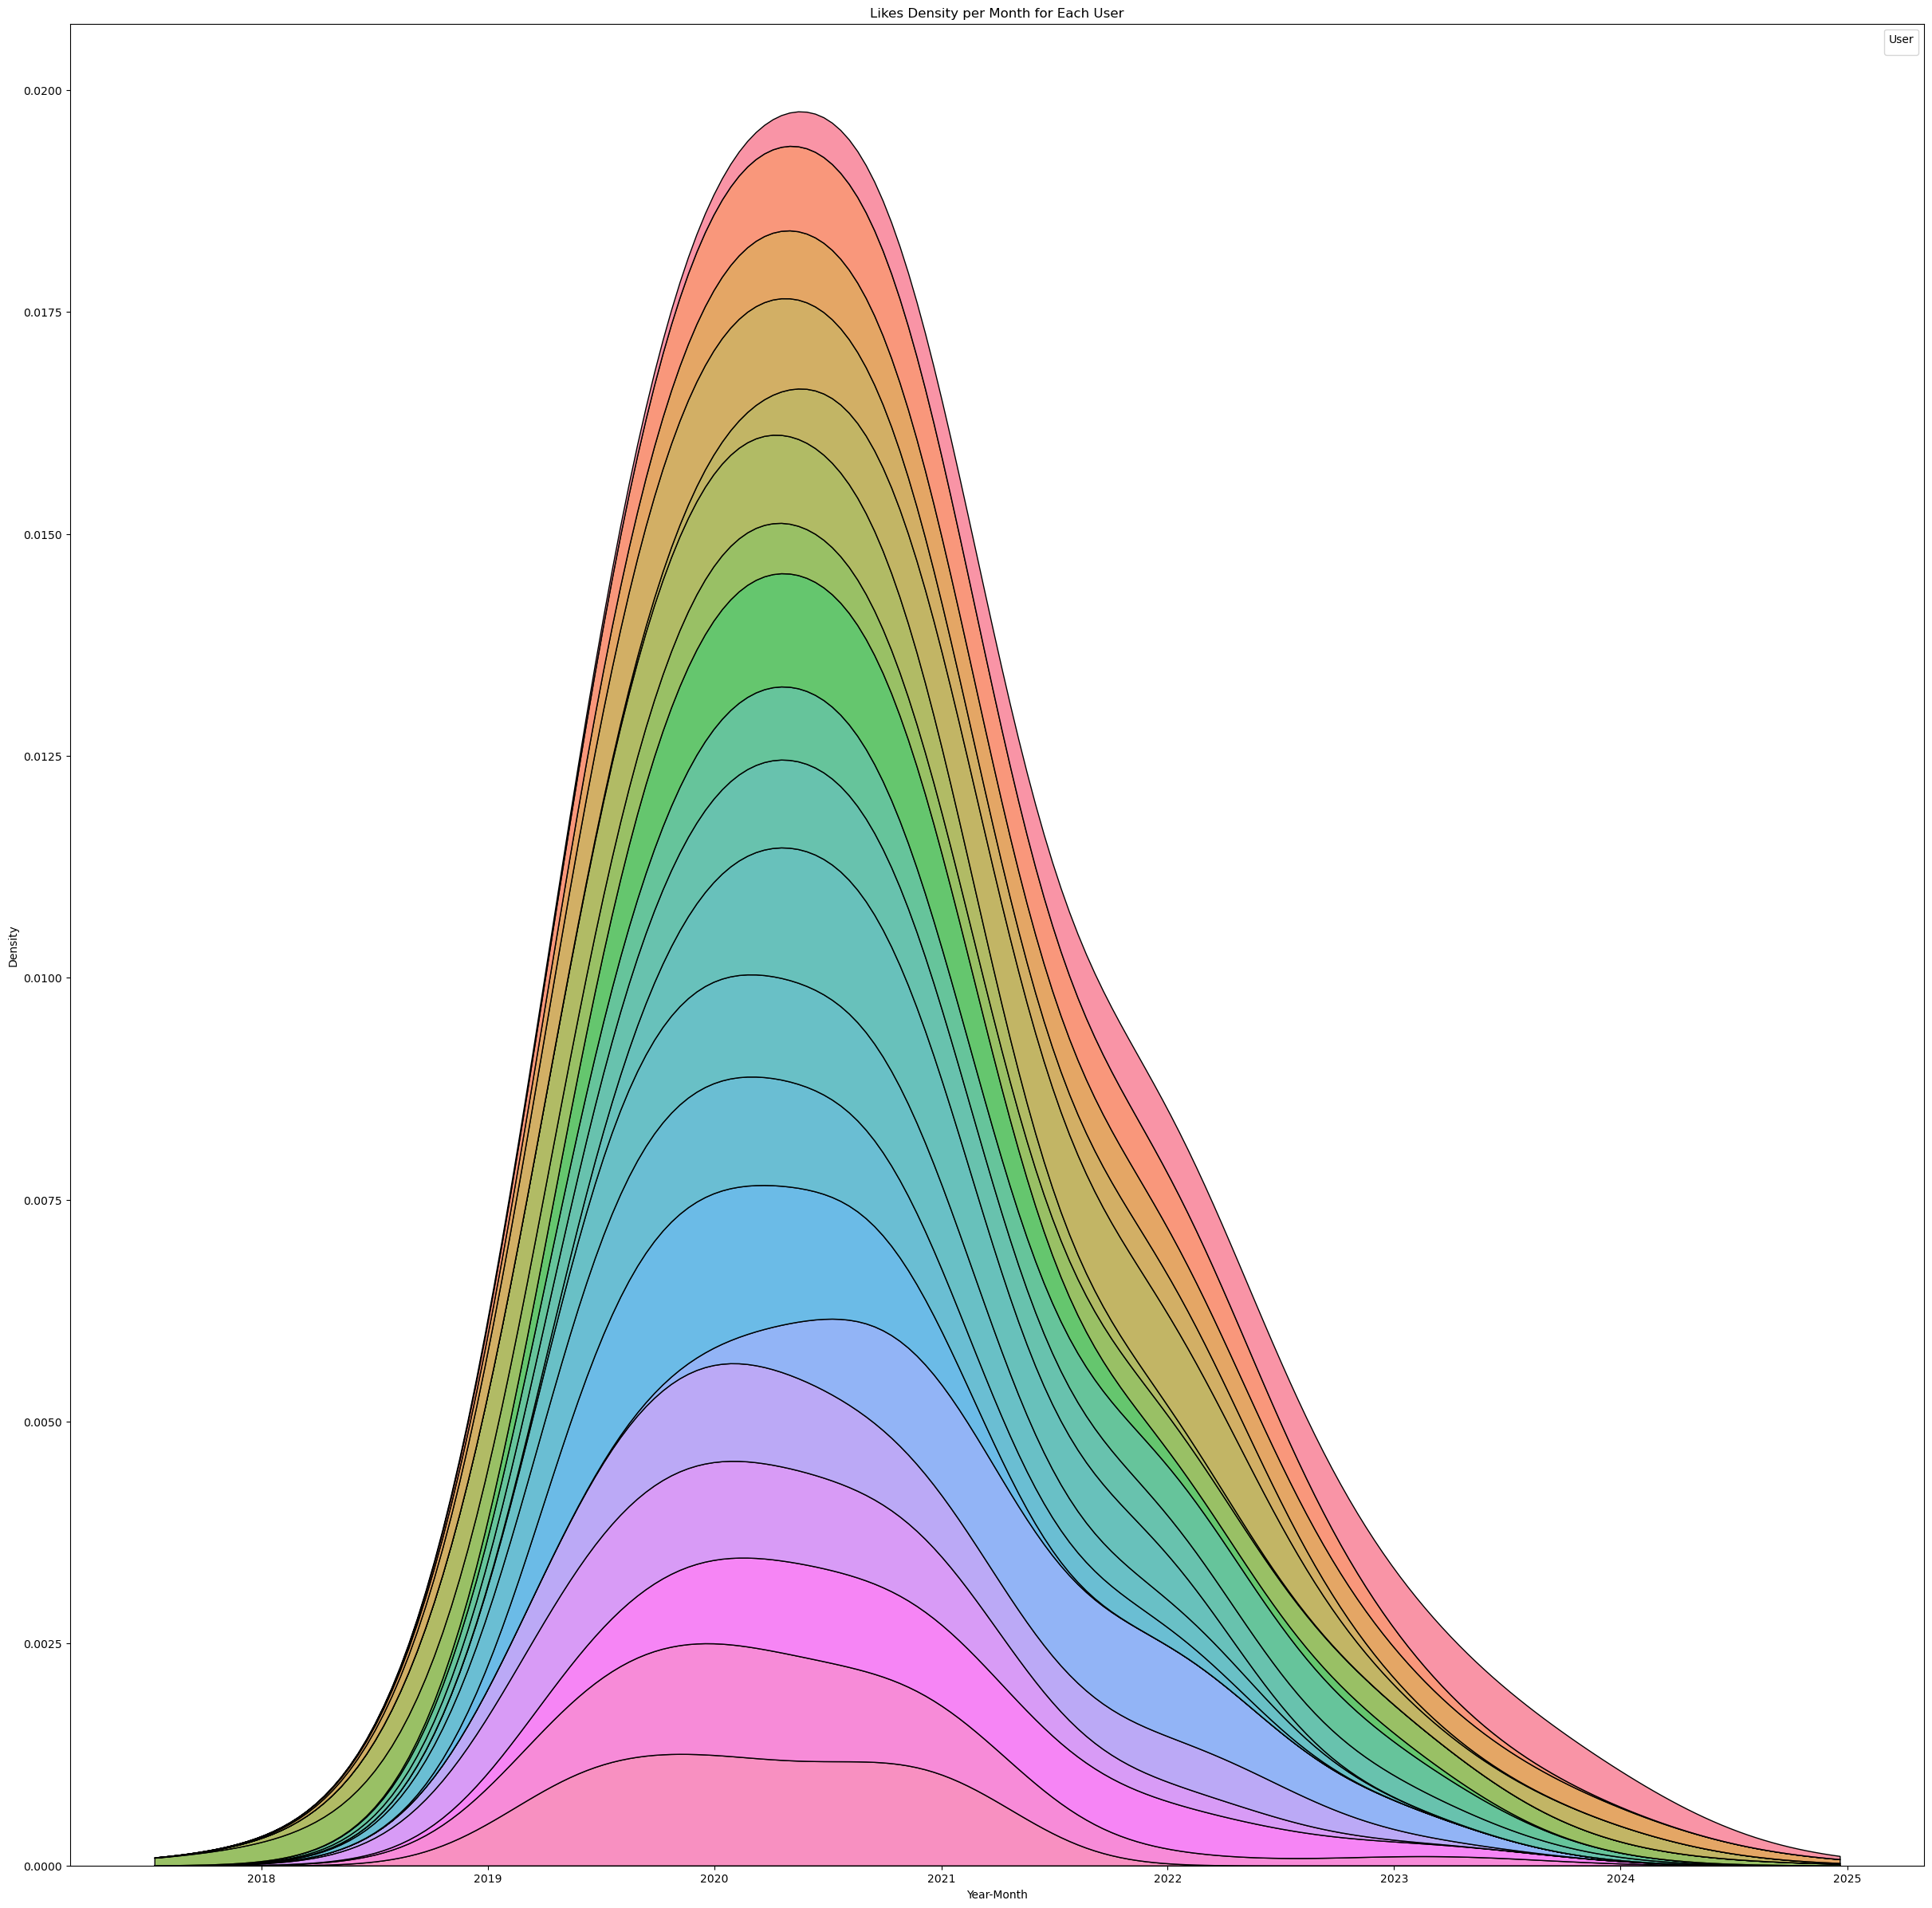

In [46]:
# Plotting using Seaborn KDE plot
plt.figure(figsize=(30, 30))
likes_per_month_df['year-month'] = pd.to_datetime(likes_per_month_df['year-month'])

sns.kdeplot(data= likes_per_month_df, x='year-month',hue='user', fill=True, common_norm=False, multiple = 'stack')
plt.title('Likes Density per Month for Each User')
plt.xlabel('Year-Month')
plt.ylabel('Density')
plt.legend(title='User')
plt.show()

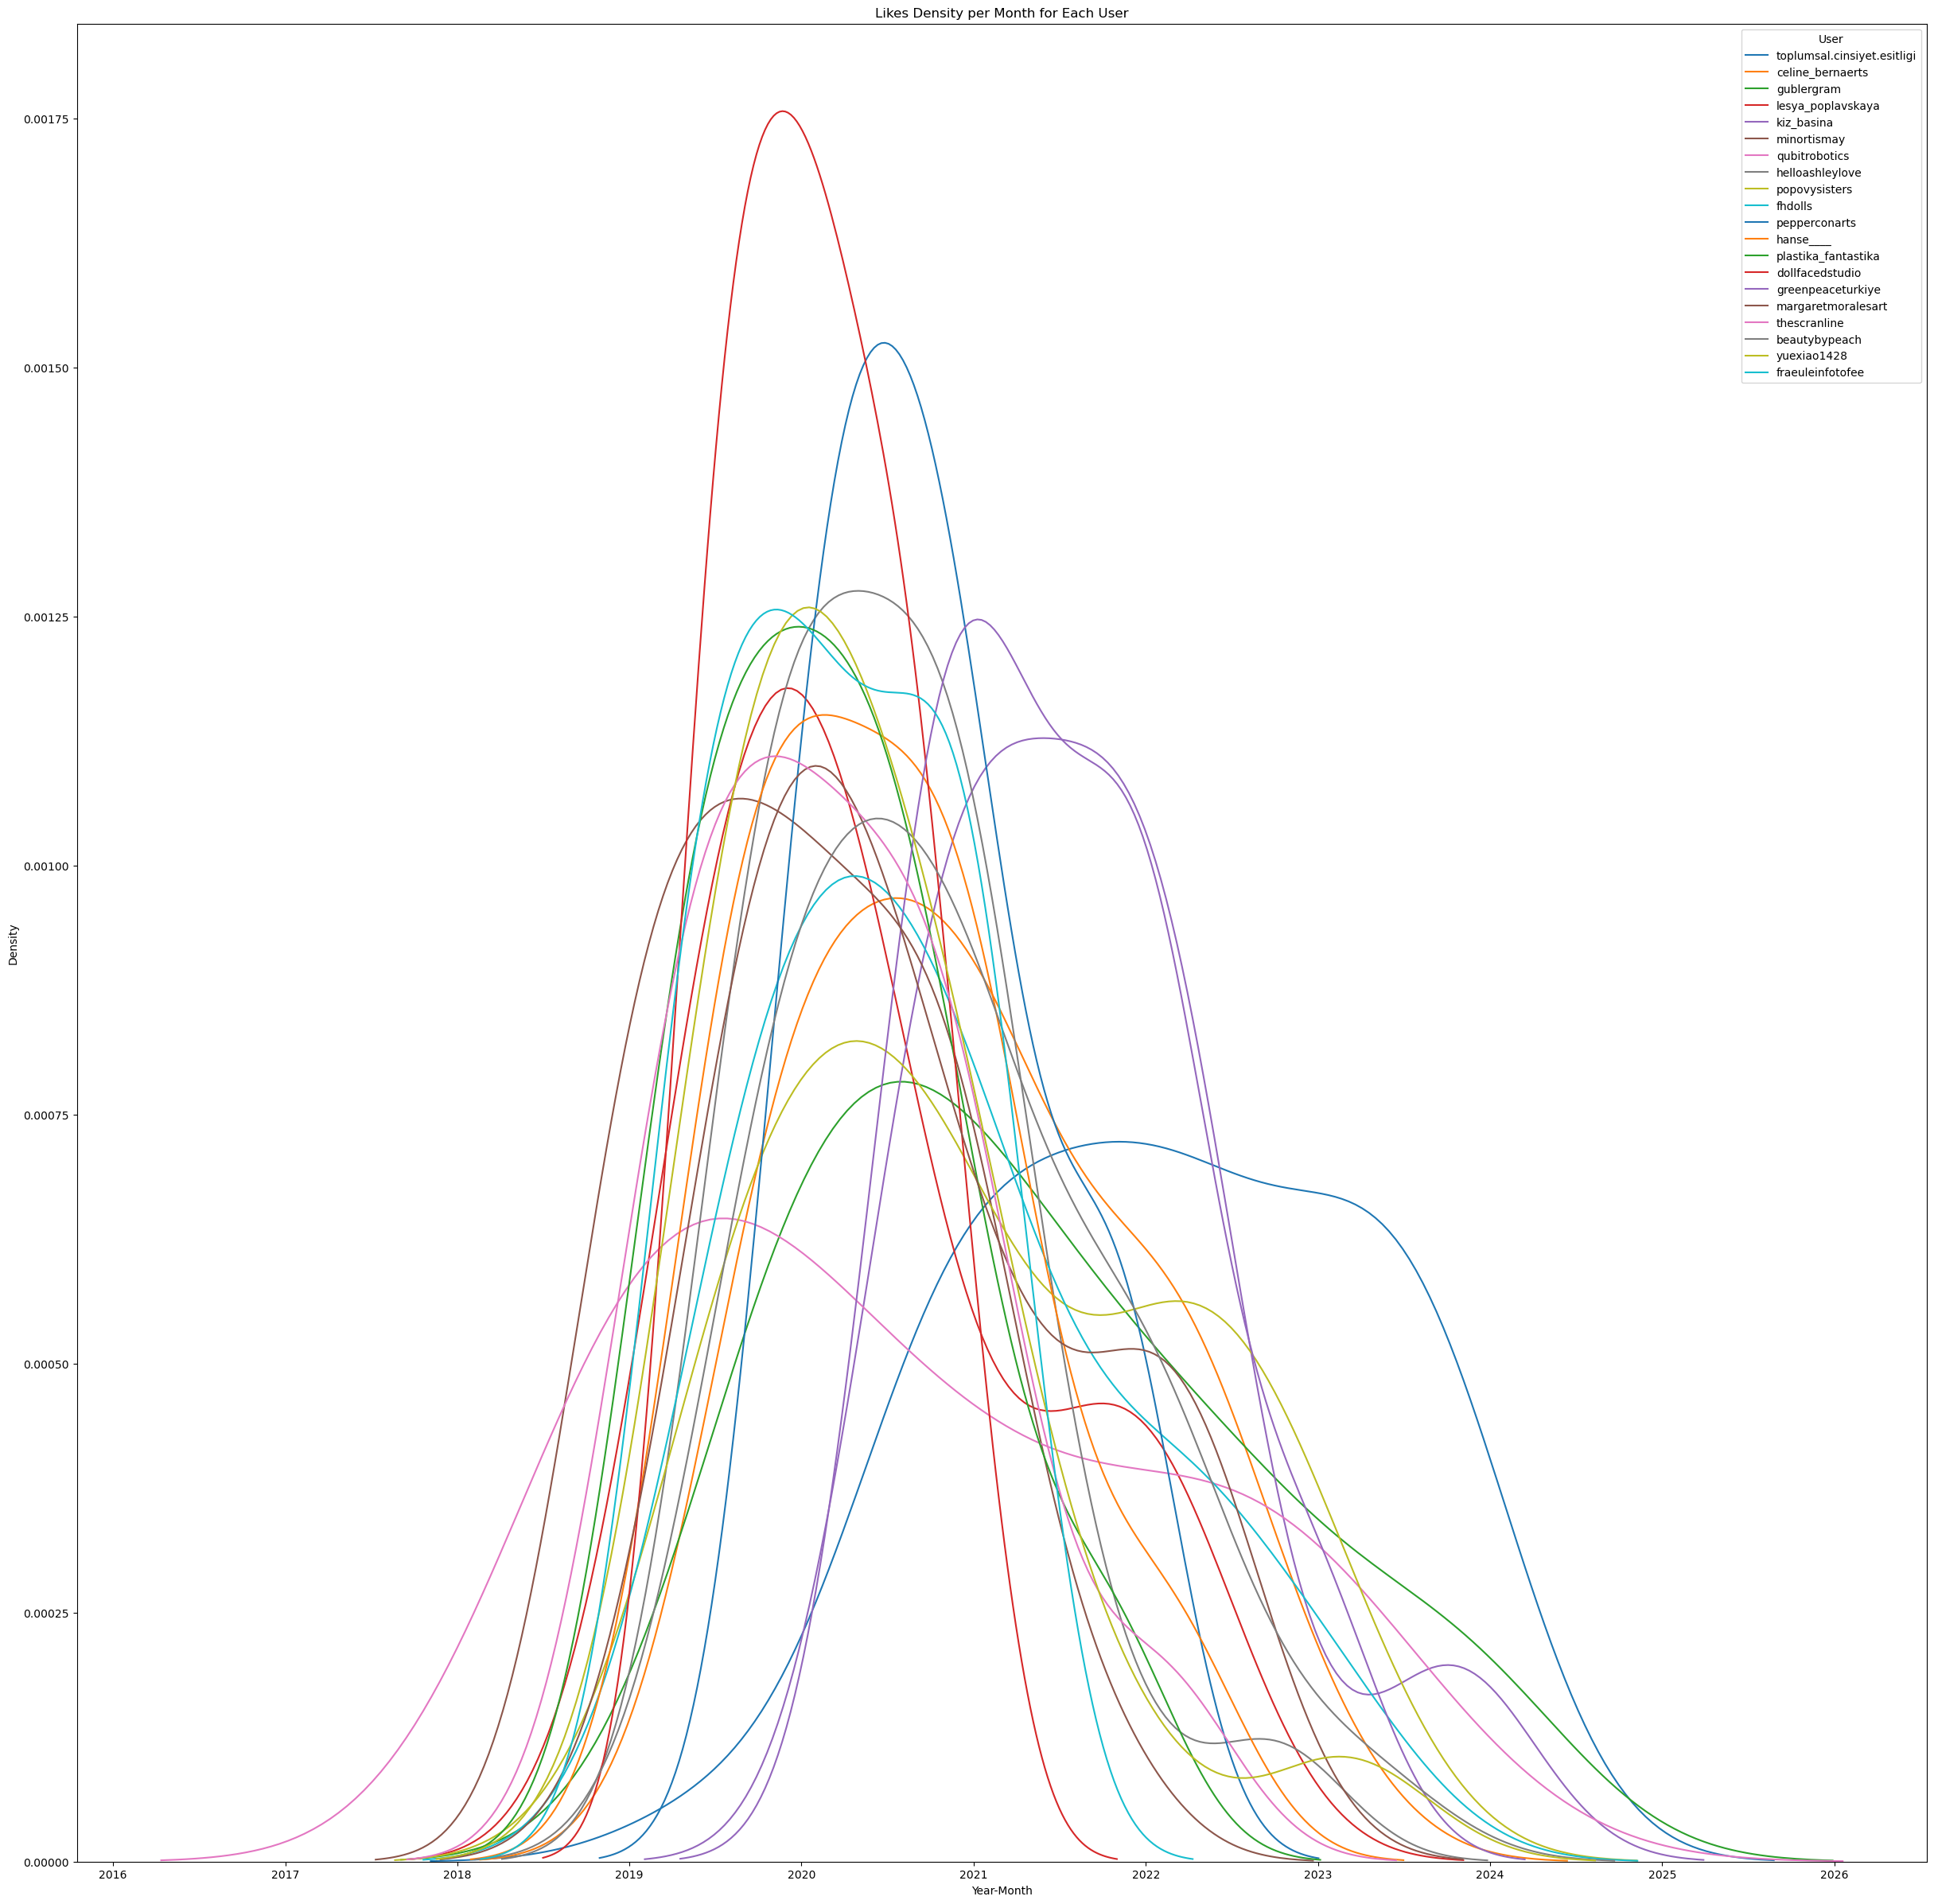

In [50]:
# Plotting using Seaborn KDE plot
plt.figure(figsize=(30, 30))
likes_per_month_df['year-month'] = pd.to_datetime(likes_per_month_df['year-month'])

for user in likes_per_month_df['user'].unique():
    user_data = likes_per_month_df[likes_per_month_df['user'] == user]
    sns.kdeplot(data=user_data, x='year-month',fill= False, common_norm=False, label=user, multiple = 'stack')
    
plt.title('Likes Density per Month for Each User')
plt.xlabel('Year-Month')
plt.ylabel('Density')
plt.legend(title='User')
plt.show()